In [ ]:
%matplotlib inline
import xarray as xr
from config_calc import *

fmt = lambda s: '/glade/scratch/mclong/calcs/iucn-ch/work/tr85.001.ann_dft_aavg.%s.1920-2100.nc'%s
varlist = ['O2','AOU','O2_CONSUMPTION','O2_PRODUCTION','IAGE']
ds = {}
for v in varlist:
    dsi = xr.open_dataset(fmt(v),decode_coords=False,decode_times=False)
    if ds:
        ds = xr.merge((ds,dsi))
    else:
        ds = dsi

plot_grid_vars = ['TLAT','TLONG','KMT','TAREA','ULAT','ULONG','UAREA',
                  'z_t','z_t_150m','z_w','dz',
                  'area_sum','vol_sum']        

ds = ds.drop([k for k in ds if k not in varlist+plot_grid_vars])
ds


In [ ]:
ds['OUR'] = ds.AOU / ds.IAGE 
ds['OUR_explicit'] = ds.O2_PRODUCTION - ds.O2_CONSUMPTION 
ds['AOU_est'] = ds.OUR * ds.IAGE

ds.AOU_est[0,:].plot(); ds.AOU[0,:].plot()

In [ ]:
baseline = ds.isel(time=slice(0,20)).mean(dim='time')
baseline

In [ ]:
delta = ds.isel(time=-1) - baseline
delta

In [ ]:
delta['AOU_circ'] = delta.IAGE * baseline.OUR
delta['AOU_our'] = delta.OUR * baseline.IAGE
delta['AOU_cov'] = delta.OUR * delta.IAGE
delta['AOU_rec'] = delta.AOU_circ + delta.AOU_our + delta.AOU_cov
#delta.AOU.plot()
delta.AOU_rec.plot()

delta.AOU_circ.plot()
delta.AOU_our.plot()
delta.AOU_cov.plot()



In [ ]:
xr.concat((delta,delta),dim='junk')

In [ ]:
paths = {'AOU': [ c', '/glade/scratch/mclong/CESM-CAM5-BGC-LE+ME/ocn/proc/tseries/monthly/AOU/b.e11.BRCP85C5CNBDRD.f09_g16.001.pop.h.AOU.200601-208012.nc', '/glade/scratch/mclong/CESM-CAM5-BGC-LE+ME/ocn/proc/tseries/monthly/AOU/b.e11.BRCP85C5CNBDRD.f09_g16.001.pop.h.AOU.208101-210012.nc'], 'IAGE': ['/glade/scratch/mclong/CESM-CAM5-BGC-LE+ME/ocn/proc/tseries/monthly/IAGE/b.e11.B20TRC5CNBDRD.f09_g16.001.pop.h.IAGE.185001-200512.nc', '/glade/scratch/mclong/CESM-CAM5-BGC-LE+ME/ocn/proc/tseries/monthly/IAGE/b.e11.BRCP85C5CNBDRD.f09_g16.001.pop.h.IAGE.200601-208012.nc', '/glade/scratch/mclong/CESM-CAM5-BGC-LE+ME/ocn/proc/tseries/monthly/IAGE/b.e11.BRCP85C5CNBDRD.f09_g16.001.pop.h.IAGE.208101-210012.nc']}
paths

In [ ]:
for l in zip(*paths.values()):
    print l
    print

In [ ]:
path = 'asdasdqw'
print hasattr(path,'__iter__')

In [2]:
from config_calc import *

In [6]:
reload(et)
p = '/glade/scratch/mclong/CESM-CAM5-BGC-LE+ME/ocn/proc/tseries/monthly/AOU/b.e11.BRCP85C5CNBDRD.f09_g16.001.pop.h.AOU.200601-208012.nc'
ds = xr.open_dataset(p,decode_coords=False,decode_times=False)
ds = ds.isel(time=slice(0,24))

ds = et.interpret_time(ds,0)
tb_name = 'time_bound'
tb = ds[tb_name]
tb = tb.diff(dim=tb.dims[1]).isel(True,**{tb.dims[1]:0})

tb



<xarray.DataArray 'time_bound' (time: 24)>
array([ 29.958333,  28.      ,  31.      ,  30.      ,  31.      ,  30.      ,
        31.      ,  31.      ,  30.      ,  31.      ,  30.      ,  31.      ,
        31.      ,  28.      ,  31.      ,  30.      ,  31.      ,  30.      ,
        31.      ,  31.      ,  30.      ,  31.      ,  30.      ,  31.      ])
Coordinates:
  * time     (time) float64 7.322e+05 7.322e+05 7.323e+05 7.323e+05 ...

In [8]:
time_vars = [k for k in ds.keys() if 'time' in ds[k].dims]
grid_vars = [k for k in ds.keys() if 'time' not in ds[k].dims]
dsg = ds.drop(time_vars)
ds = ds.drop(grid_vars)


In [10]:
dso = (ds * tb).groupby('year').sum(dim='time')
dso

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, year: 7, z_t: 60)
Coordinates:
  * year        (year) float64 5.617e+04 5.62e+04 6.01e+04 6.018e+04 ...
Dimensions without coordinates: d2, nlat, nlon, z_t
Data variables:
    AOU         (year, z_t, nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    time_bound  (year, d2) float64 2.05e+07 2.05e+07 2.051e+07 2.051e+07 ...
    yearfrac    (year) float64 5.617e+04 5.62e+04 6.01e+04 2.407e+05 ...
    month       (year) float64 56.0 56.0 29.96 900.0 900.0 1.395e+03 1.426e+03

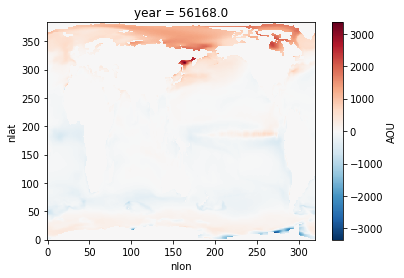

In [12]:
%matplotlib inline
dso.AOU[0,0,:,:].plot()

In [14]:
preprocess_kwargs = [{}]*3
preprocess_kwargs

[{}, {}, {}]